## Лабораторная работа № 4

#### Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.



###### Набор данных: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

## Импорт библиотек:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


### Загрузка и первичная подготовка данных:

In [7]:
# Загрузка данных
data = pd.read_csv("houses_to_rent_v2.csv")
data.shape


(499, 13)

In [8]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,São Paulo,120,3,3,2,9,acept,furnished,1200,3500,109,45,4854
495,Rio de Janeiro,90,2,2,0,5,acept,not furnished,830,2500,84,33,3447
496,Porto Alegre,125,4,2,0,7,acept,not furnished,1006,1632,150,14,2802
497,São Paulo,200,3,4,3,6,acept,furnished,1800,5058,1200,65,8123


In [9]:
# уникальные значения столбца 'city'
data['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [10]:
# список колонок с типами данных
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

### Обработка пропусков в данных:

In [11]:
# проверим, есть ли пропущенные значения
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

Пропущенных данных нет, можем присутпать к масштабированию данных

### Масштабирование данных:

#### MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

In [12]:
from sklearn.preprocessing import MinMaxScaler

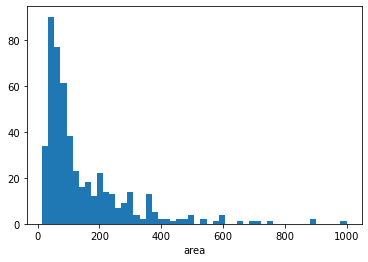

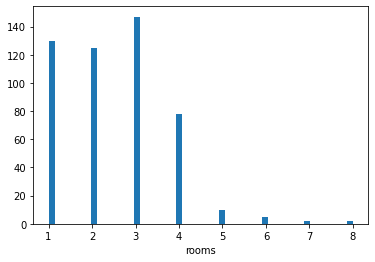

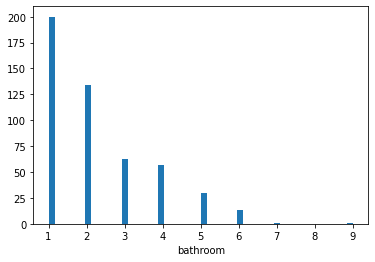

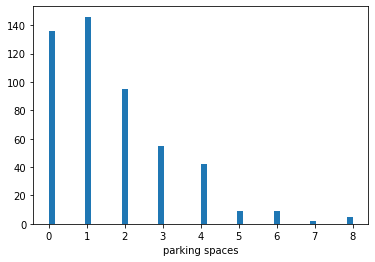

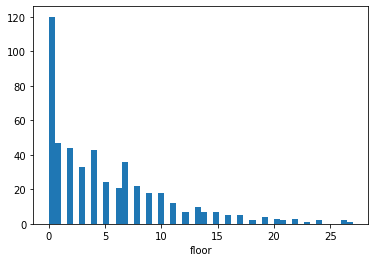

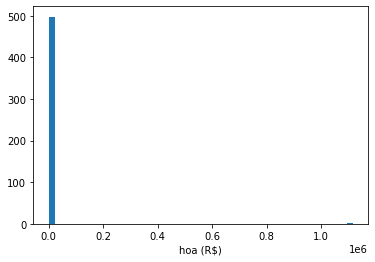

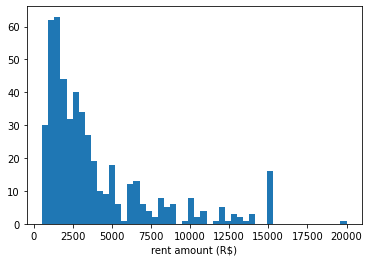

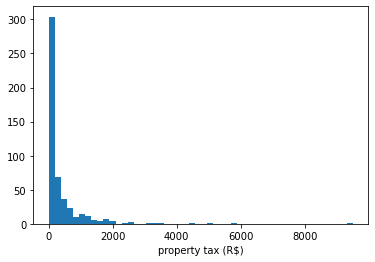

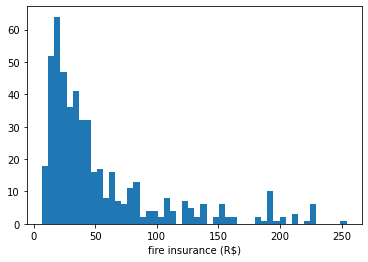

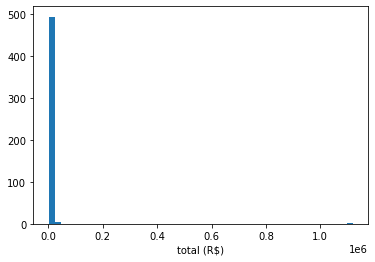

In [13]:
# список колонок с числовыми данными
num_cols = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)']
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [14]:
# MinMax масштабирование
sc1 = MinMaxScaler()
for item in num_cols:
    data.loc[:, item] = sc1.fit_transform(data[[item]])

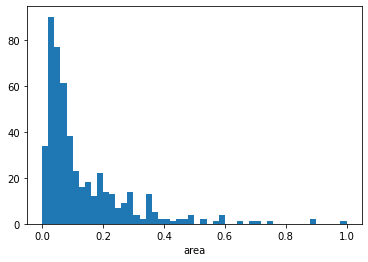

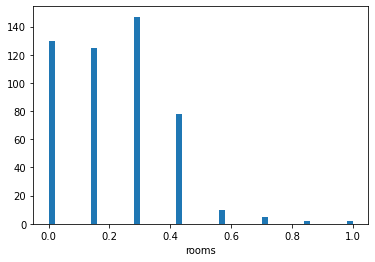

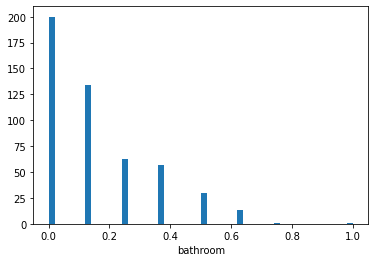

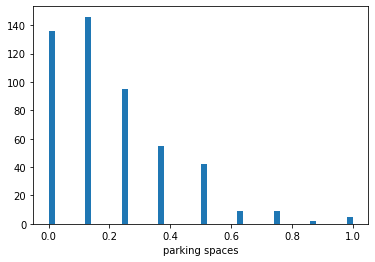

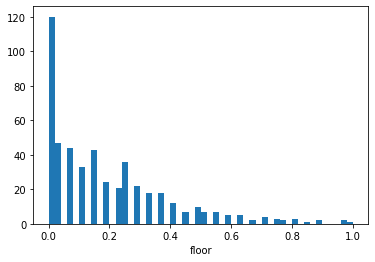

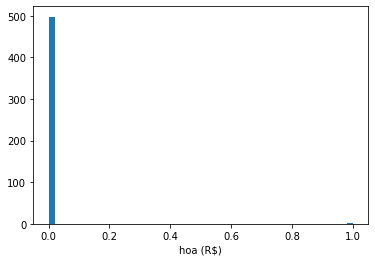

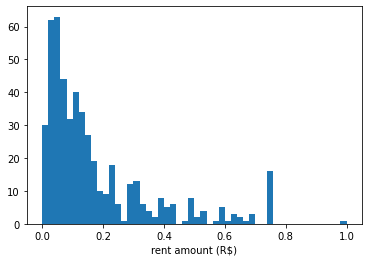

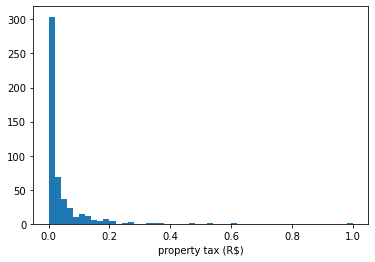

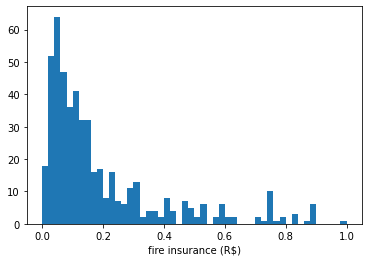

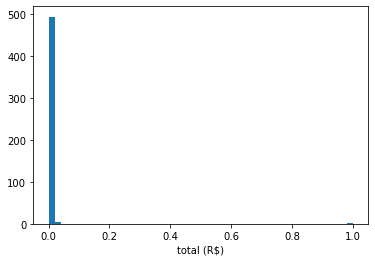

In [15]:
# Гистограмма по отмасштабированным признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

### Кодирование категориальных признаков:

In [16]:
# Выберем категориальные колонки
# Цикл по колонкам датасета
for col in data.columns:
    dt = str(data[col].dtype)
    if dt=='object':
        temp_un = data[col].nunique()
        print('Колонка {}. Тип данных {}. Количество уникальных значений {}.'.format(col, dt, temp_un))

Колонка city. Тип данных object. Количество уникальных значений 5.
Колонка animal. Тип данных object. Количество уникальных значений 2.
Колонка furniture. Тип данных object. Количество уникальных значений 2.


#### Кодирование категорий наборами бинарных значений - one-hot encoding

In [17]:
cat_cols = ['city', 'animal', 'furniture']
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,0,0,0,0,1,1,0,1,0
1,0,0,0,0,1,1,0,0,1
2,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,0,1,0,1


In [18]:
# Замена исходных категориальных колонок наборами бинарных значений
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [19]:
# первые 5 строк получившегося набора данных
data.head()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,0.055894,0.142857,0.000,0.125,0.259259,0.001849,0.141388,0.022211,0.141700,0.004473,0,0,0,0,1,1,0,1,0
1,0.309959,0.428571,0.375,0.000,0.740741,0.001074,0.226735,0.184211,0.226721,0.006577,0,0,0,0,1,1,0,0,1
2,0.066057,0.000000,0.000,0.125,0.222222,0.000895,0.115681,0.000000,0.137652,0.002886,0,0,1,0,0,1,0,0,1
3,0.036585,0.142857,0.000,0.000,0.074074,0.000242,0.028895,0.002316,0.040486,0.000724,0,0,1,0,0,1,0,0,1
4,0.010163,0.000000,0.000,0.000,0.037037,0.000000,0.012853,0.002632,0.016194,0.000201,0,0,0,0,1,0,1,0,1


### Построение моделей:

#### Разделение выборки на обучающую и тестовую

In [25]:
from sklearn.model_selection import train_test_split
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('total (R$)')], data['total (R$)'], random_state=1)
X = data.drop(['total (R$)'], axis=1)
y = data['total (R$)']

#### Модель "Линейная регрессия"

In [26]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(data_train, data_y_train)
lin_regr.coef_, lin_regr.intercept_
y_predicted = lin_regr.predict(data_test)

#### Модель "SVM"

In [36]:
from sklearn.svm import LinearSVR

In [51]:
# обучим модель с С=0.1
lin_svr = LinearSVR(C=0.1, max_iter=10000)
lin_svr.fit(data_train, data_y_train)
lin_svr_predicted = lin_svr.predict(data_test)

Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [52]:
r2_score(data_y_test, lin_svr_predicted)

0.9309362132164307

In [53]:
# обучим модель с С=1
lin_svr = LinearSVR(C=1, max_iter=10000)
lin_svr.fit(data_train, data_y_train)
lin_svr_predicted = lin_svr.predict(data_test)

In [54]:
r2_score(data_y_test, lin_svr_predicted)

0.9999996855401929

In [55]:
# обучим модель с С=10
lin_svr = LinearSVR(C=10, max_iter=10000)
lin_svr.fit(data_train, data_y_train)
lin_svr_predicted = lin_svr.predict(data_test)

In [56]:
r2_score(data_y_test, lin_svr_predicted)

0.9999994710341636

In [57]:
# обучим модель с С=100
lin_svr = LinearSVR(C=100, max_iter=10000)
lin_svr.fit(data_train, data_y_train)
lin_svr_predicted = lin_svr.predict(data_test)

In [58]:
r2_score(data_y_test, lin_svr_predicted)

0.9999995823887493

In [59]:
# обучим модель с С=1000
lin_svr = LinearSVR(C=1000, max_iter=10000)
lin_svr.fit(data_train, data_y_train)
lin_svr_predicted = lin_svr.predict(data_test)

In [60]:
r2_score(data_y_test, lin_svr_predicted)

0.9999996404959989

In [61]:
params = [{'C':np.geomspace(0.01,1000, 20)}]
lin_svr_grid = GridSearchCV(LinearSVR(max_iter=10000), params)
lin_svr_grid.fit(X, y)
lin_svr_grid.best_params_

Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Z:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'C': 1000.0}

#### Модель "Дерево решений"

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Оценка качества моделей:

В качестве метрик для оценки качества моделей будем использовать Mean squared error (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и метрику $R^2$ (коэффициент детерминации), потому что эта метрика является нормированной.

In [65]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nЛинейная регрессия: {}\nSVM: {}\nДерево решений: {}'.format(mean_squared_error(data_y_test, y_predicted), mean_squared_error(data_y_test, lin_svr_predicted), mean_squared_error(data_y_test, data_test_predicted_dtc)))

Метрика MSE:
Линейная регрессия: 1.2620378994162762e-12
SVM: 5.595553955718766e-12
Дерево решений: 4.009125408728235e-07


In [66]:
#Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nЛинейная регрессия: {}\nSVM: {}\nДерево решений: {}'.format(r2_score(data_y_test, y_predicted),r2_score(data_y_test, lin_svr_predicted), r2_score(data_y_test, data_test_predicted_dtc)))

Метрика R²:
Линейная регрессия: 0.9999999189163972
SVM: 0.9999996404959989
Дерево решений: 0.974242110132498


## Выводы о качестве построенных моделей:

Исходя из оценки качества построенных моделей, можно увидеть, что модель "Линейной регрессии" лучше всех справляется с задачей, за ней идут модель "SVM", имеющая показатели немного хуж и, замыкающая этот список, модель "Дерево решений", что может свидетельствовать о переобучении модели "Дерево решений".